# Life Expectancy Data



*Import “Life_Expectancy_Data.csv” data with Pandas

*Check whether there are missing values in the data, carry out feature engineering to remove or fill in missing values

*How much memory is used by the DataFrame

*Calculate the minimum, average and maximum values of life expectancy

*Histogram plot, pairplot and heatmap of the correlation matrix for all features

*Plot a scatterplot between “Income composition of resources” and “life expectancy”, using “status” as the hue attribute.

*Give comments on the plot formed.

*Plot a scatterplot between “Schooling” and “life expectancy”, using “status” as the hue attribute. Comment on the plot formed.

*Divide the data into 80% training data and 20% testing data

*Train XG-boost model

*Evaluate the trained regression model, what is R2?

*Plot of predictions from trained model vs actual output (ground-truth)

In [181]:
#import library
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

In [182]:
#Impor data “Life_Expectancy_Data.csv”
life_expectancy_df = pd.read_csv('E:\_Portofolio\PortofolioProject\LifeExpectancy\Life_Expectancy_Data.csv')
life_expectancy_df

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [183]:
#Check whether there are missing values in the data, carry out feature engineering to remove or fill in missing values
life_expectancy_df.isnull().sum()

Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

<Axes: >

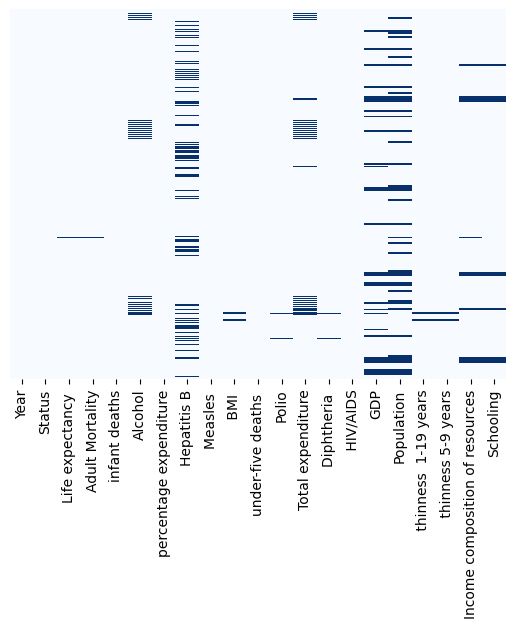

In [184]:
sns.heatmap(life_expectancy_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [185]:
#remove the data that is
life_expectancy_df.dropna(how = 'any', inplace = True)

In [186]:
life_expectancy_df

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [187]:
life_expectancy_df.isnull().sum()

Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [188]:
#Used memory of the DataFrame (283.4+ KB)
life_expectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             1649 non-null   int64  
 1   Status                           1649 non-null   object 
 2   Life expectancy                  1649 non-null   float64
 3   Adult Mortality                  1649 non-null   float64
 4   infant deaths                    1649 non-null   int64  
 5   Alcohol                          1649 non-null   float64
 6   percentage expenditure           1649 non-null   float64
 7   Hepatitis B                      1649 non-null   float64
 8   Measles                          1649 non-null   int64  
 9    BMI                             1649 non-null   float64
 10  under-five deaths                1649 non-null   int64  
 11  Polio                            1649 non-null   float64
 12  Total expenditure   

In [189]:
#Calculate the minimum, average and maximum values of life expectancy
life_expectancy_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [190]:
life_expectancy_df.min()

Year                                    2000
Status                             Developed
Life expectancy                         44.0
Adult Mortality                          1.0
infant deaths                              0
Alcohol                                 0.01
percentage expenditure                   0.0
Hepatitis B                              2.0
Measles                                    0
 BMI                                     2.0
under-five deaths                          0
Polio                                    3.0
Total expenditure                       0.74
Diphtheria                               2.0
 HIV/AIDS                                0.1
GDP                                  1.68135
Population                              34.0
 thinness  1-19 years                    0.1
 thinness 5-9 years                      0.1
Income composition of resources          0.0
Schooling                                4.2
dtype: object

In [191]:
life_expectancy_df.max()

Year                                       2015
Status                               Developing
Life expectancy                            89.0
Adult Mortality                           723.0
infant deaths                              1600
Alcohol                                   17.87
percentage expenditure               18961.3486
Hepatitis B                                99.0
Measles                                  131441
 BMI                                       77.1
under-five deaths                          2100
Polio                                      99.0
Total expenditure                         14.39
Diphtheria                                 99.0
 HIV/AIDS                                  50.6
GDP                                 119172.7418
Population                         1293859294.0
 thinness  1-19 years                      27.2
 thinness 5-9 years                        28.2
Income composition of resources           0.936
Schooling                               

In [192]:
life_expectancy_df.mean()

C:\Users\USER\AppData\Local\Temp\ipykernel_10528\3691447982.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  life_expectancy_df.mean()


Year                               2.007841e+03
Life expectancy                    6.930230e+01
Adult Mortality                    1.682153e+02
infant deaths                      3.255306e+01
Alcohol                            4.533196e+00
percentage expenditure             6.989736e+02
Hepatitis B                        7.921771e+01
Measles                            2.224494e+03
 BMI                               3.812862e+01
under-five deaths                  4.422013e+01
Polio                              8.356458e+01
Total expenditure                  5.955925e+00
Diphtheria                         8.415525e+01
 HIV/AIDS                          1.983869e+00
GDP                                5.566032e+03
Population                         1.465363e+07
 thinness  1-19 years              4.850637e+00
 thinness 5-9 years                4.907762e+00
Income composition of resources    6.315512e-01
Schooling                          1.211989e+01
dtype: float64

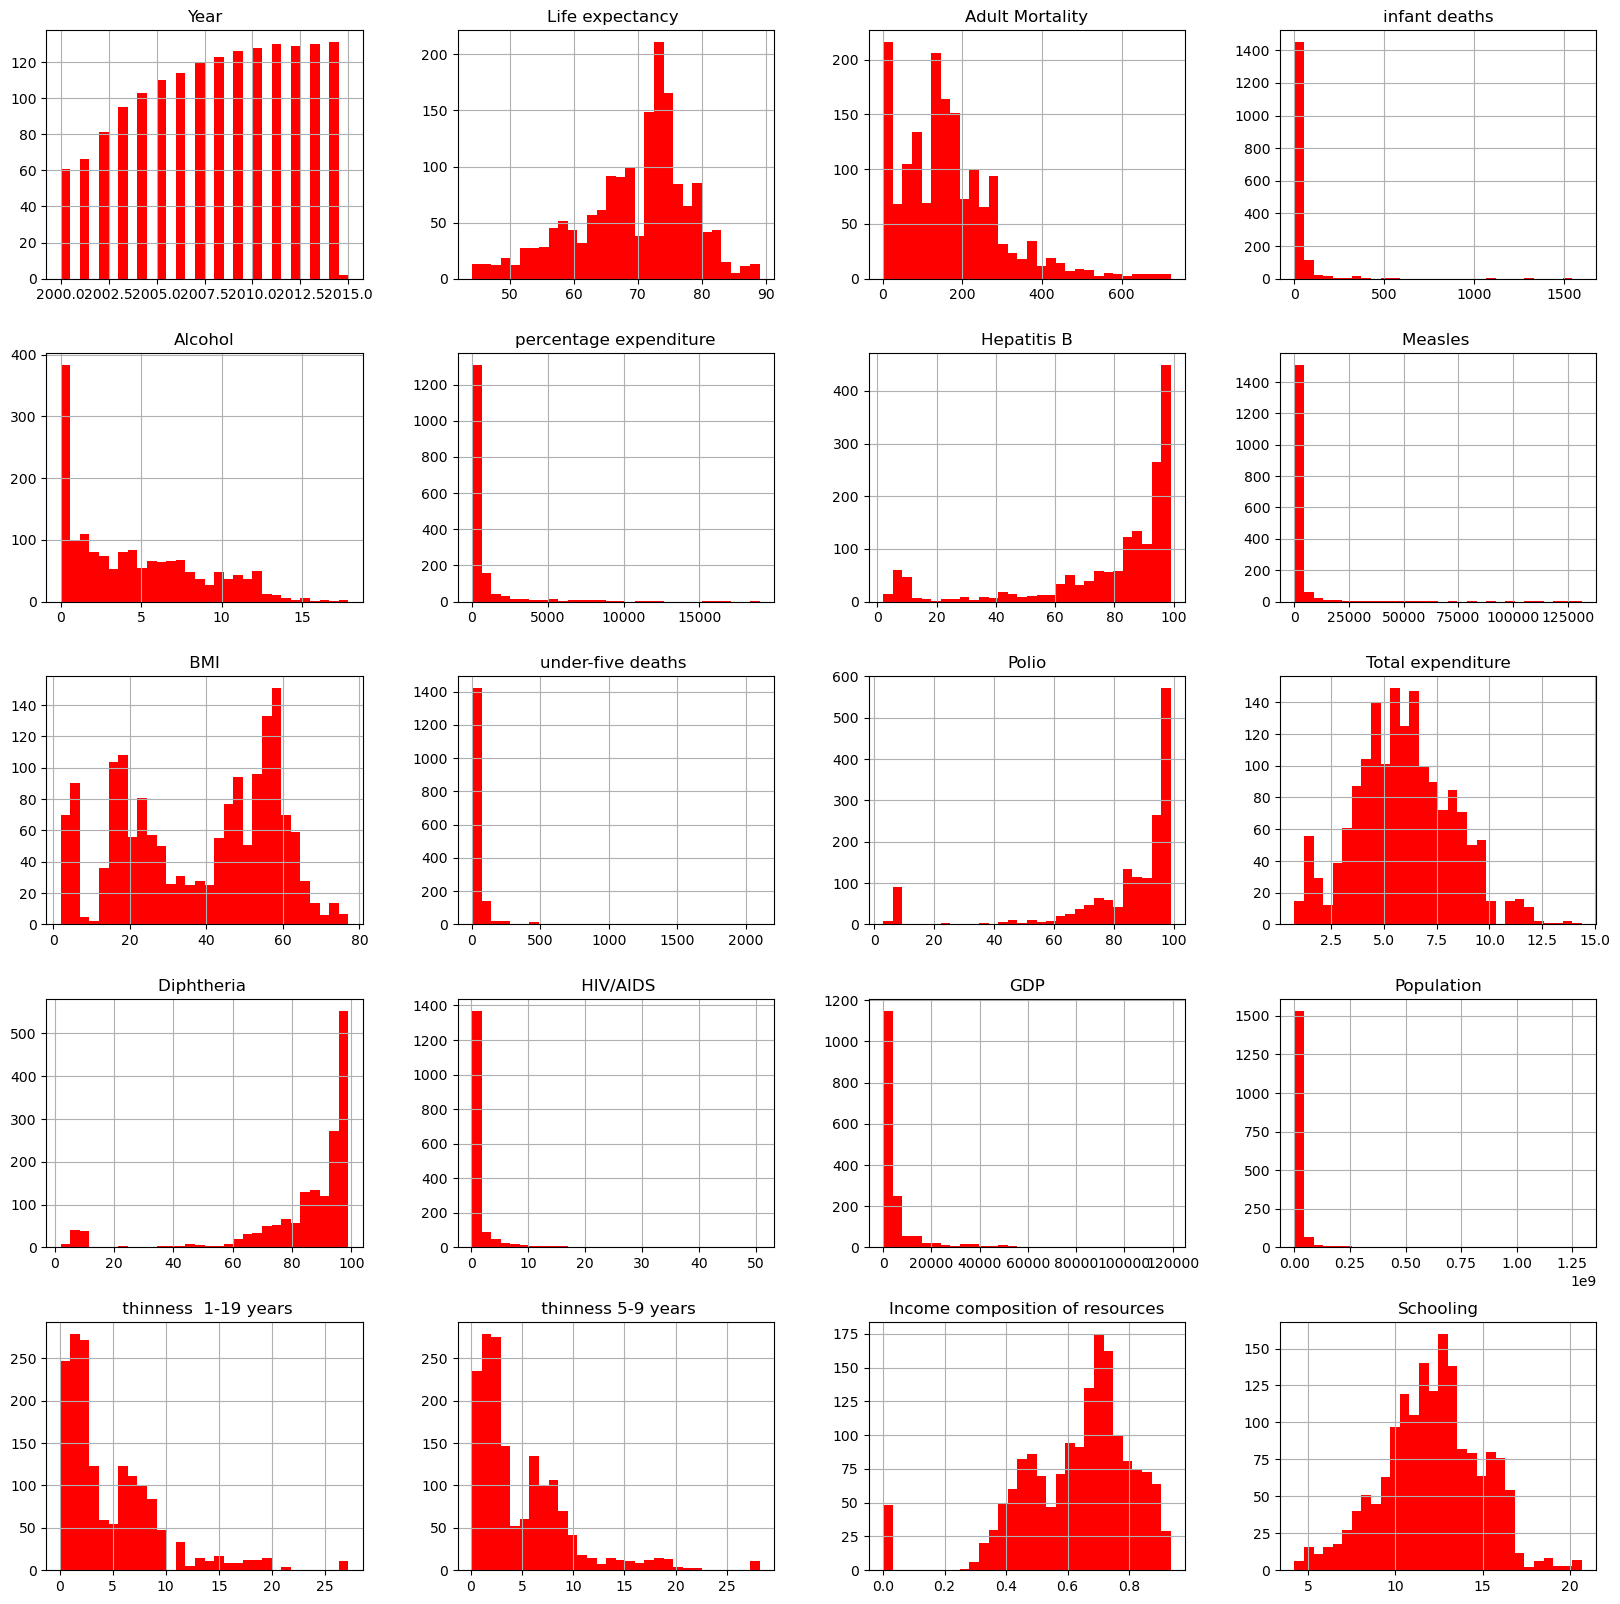

In [193]:
#Histogram plot, pairplot and heatmap of the correlation matrix for all features
life_expectancy_df.hist(bins = 30, color = 'r', figsize = (20,20))
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_10528\202603583.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(life_expectancy_df.corr(), annot = True)


<Axes: >

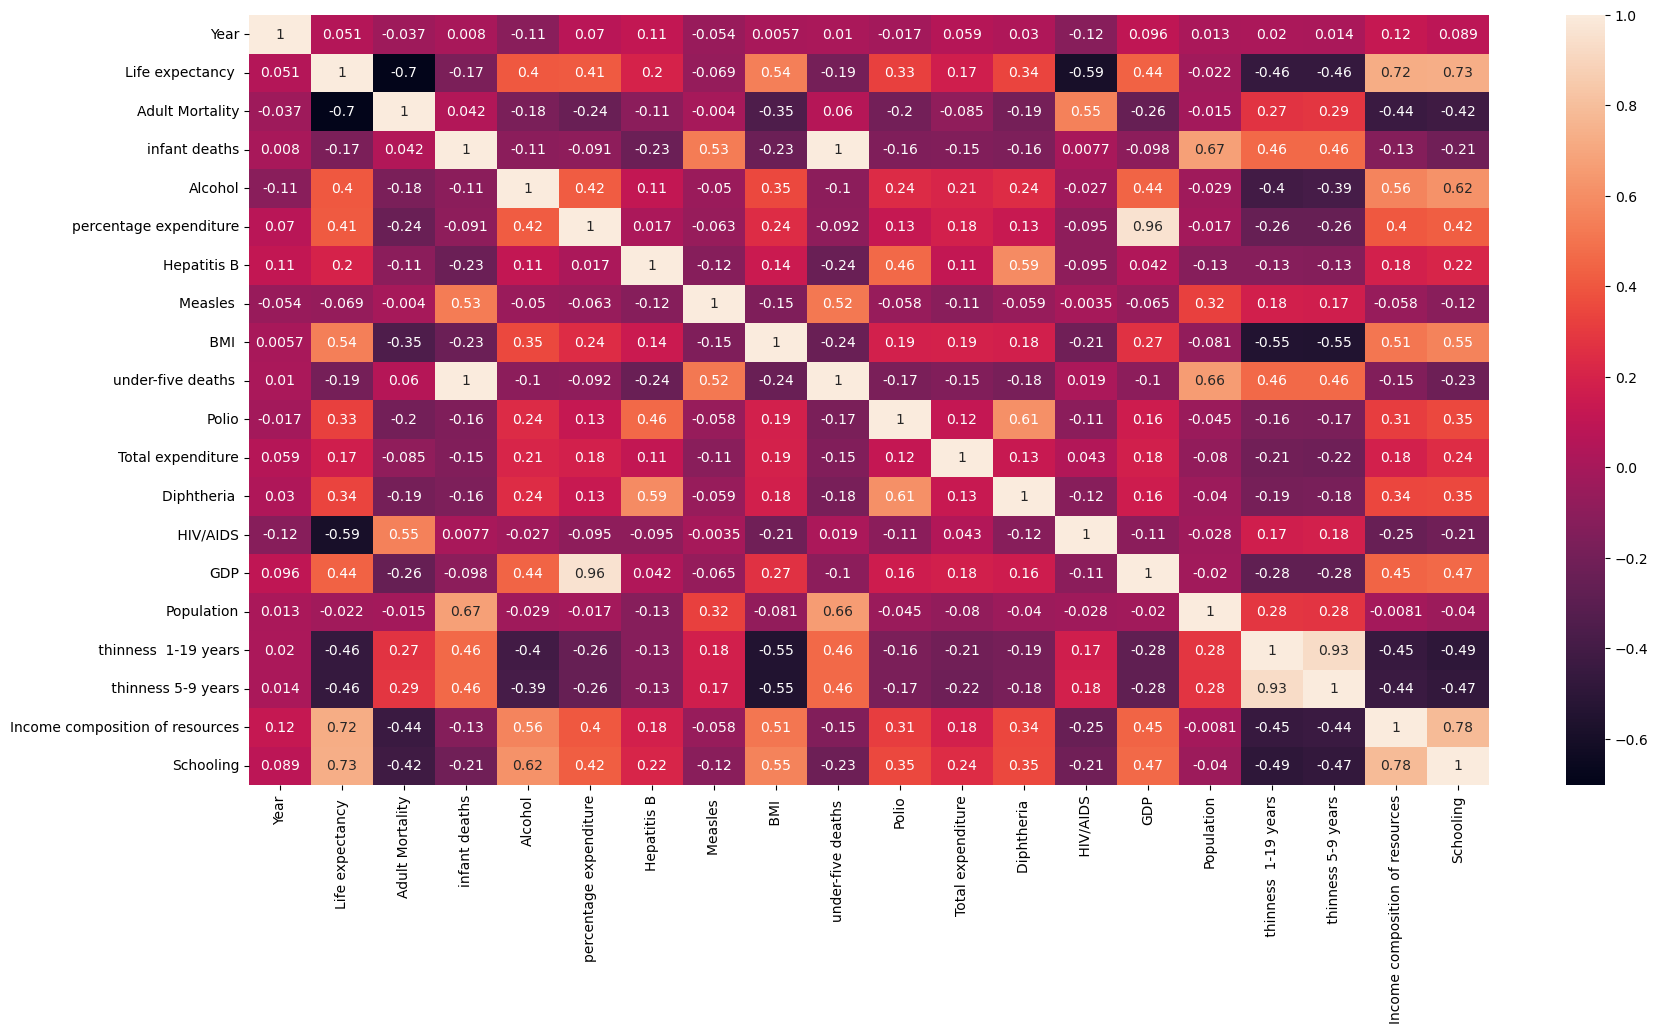

In [194]:
plt.figure(figsize = (20,10))
sns.heatmap(life_expectancy_df.corr(), annot = True)

In [195]:
corr_matrix = life_expectancy_df.corr()
corr_pairs = corr_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(ascending=False)
hi_corr = sorted_pairs[(sorted_pairs!= 1) & (sorted_pairs > 0.5)]
hi_corr

C:\Users\USER\AppData\Local\Temp\ipykernel_10528\2001614778.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = life_expectancy_df.corr()


infant deaths                    under-five deaths                  0.996906
under-five deaths                infant deaths                      0.996906
percentage expenditure           GDP                                0.959299
GDP                              percentage expenditure             0.959299
 thinness  1-19 years             thinness 5-9 years                0.927913
 thinness 5-9 years               thinness  1-19 years              0.927913
Schooling                        Income composition of resources    0.784741
Income composition of resources  Schooling                          0.784741
Life expectancy                  Schooling                          0.727630
Schooling                        Life expectancy                    0.727630
Life expectancy                  Income composition of resources    0.721083
Income composition of resources  Life expectancy                    0.721083
Population                       infant deaths                      0.671758

In [196]:
corr_df = pd.DataFrame(hi_corr)
corr_df

,,0
infant deaths,under-five deaths,0.996906
under-five deaths,infant deaths,0.996906
percentage expenditure,GDP,0.959299
GDP,percentage expenditure,0.959299
thinness 1-19 years,thinness 5-9 years,0.927913
thinness 5-9 years,thinness 1-19 years,0.927913
Schooling,Income composition of resources,0.784741
Income composition of resources,Schooling,0.784741
Life expectancy,Schooling,0.727630
Schooling,Life expectancy,0.727630


In [197]:
corr_df = corr_df.drop_duplicates()
corr_df

0
infant deaths                   under-five deaths                0.996906
percentage expenditure          GDP                              0.959299
 thinness  1-19 years            thinness 5-9 years              0.927913
Schooling                       Income composition of resources  0.784741
Life expectancy                 Schooling                        0.727630
                                Income composition of resources  0.721083
Population                      infant deaths                    0.671758
                                under-five deaths                0.658680
Alcohol                         Schooling                        0.616975
Diphtheria                      Polio                            0.609245
                                Hepatitis B                      0.588990
Income composition of resources Alcohol                          0.561074
Schooling                        BMI                             0.554844
 HIV/AIDS                       Adult Mortality                  0.550691
Life expectancy                  BMI                             0.542042
Measles                         infant deaths                    0.532680
                                under-five deaths                0.517506
 BMI                            Income composition of resources  0.510505

In [198]:
# sns.pairplot(life_expectancy_df)
# plt.show()

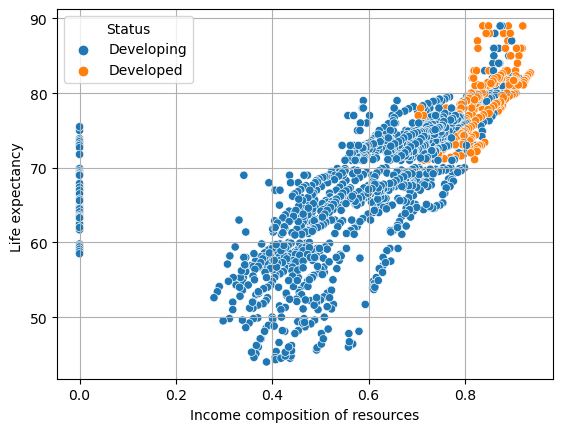

In [199]:
#Plot a scatterplot between “Income composition of resources” and “life expectancy”, using “status” as the hue attribute
sns.scatterplot(x = 'Income composition of resources', y = 'Life expectancy ', hue = 'Status', data = life_expectancy_df);
plt.grid()

Based on the results of the scatter plot between 'Life expectancy' and 'Income composition of resources' it can be concluded that the relationship between the value of 'Income composition of resources' and 'Life expectancy' is a positive regression. Where the Developed status is at an x-axis value above 0 to 0.6, and the y-axis value is 70 to 90. Meanwhile, the Developing status is at an x-axis value above 0.7 to 0.9, and the y-axis value is 0 to 70.

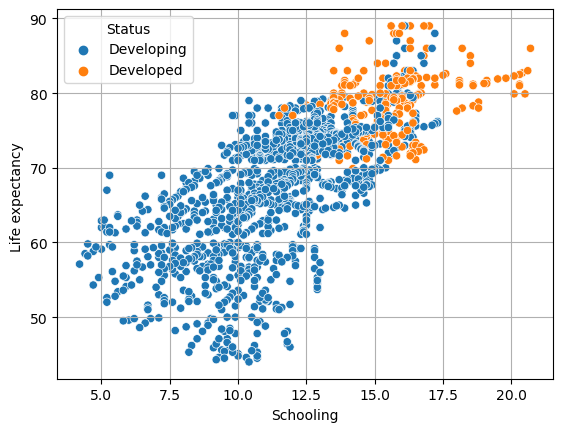

In [200]:
#Plot a scatterplot between “BMI” and “life expectancy”, using “status” as the hue attribute
sns.scatterplot(x = 'Schooling', y = 'Life expectancy ', hue = 'Status', data = life_expectancy_df)
plt.grid()

Based on the results of the scatter plot between 'Schooling' and 'Life expectancy' it can be concluded that the relationship between the values of 'Schooling' and 'Life expectancy' is a positive regression. Where the Developed status is at the x-axis value above 11 to 21, and the y-axis value is 70 to 90. Meanwhile, the Developing status is at the x-axis value above 0 to 10.5, and the y-axis value is 0 to 70.

In [202]:
#create one hot encoding for 'Status'
life_expectancy_df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [210]:
life_expectancy_df = pd.get_dummies(life_expectancy_df, columns = ['Status'])
life_expectancy_df
#now the status column has been encoded to developed = 0 and developing = 1

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0,1
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0,1
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0,1
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0,1


In [211]:
#look at the number of null values for columns that have null values, then only take those where the number is not equal to null
life_expectancy_df.isnull().sum()[np.where(life_expectancy_df.isnull().sum() != 0)[0]]

Series([], dtype: int64)

In [212]:
#fill in null values with the mean value, because most of the values are continuous
life_expectancy_df = life_expectancy_df.apply(lambda x: x.fillna(x.mean()), axis = 0)

In [213]:
#double check for null values
life_expectancy_df.isnull().sum()[np.where(life_expectancy_df.isnull().sum() != 0) [0]]

Series([], dtype: int64)

In [214]:
#Create training data and test data
X = life_expectancy_df.drop(columns = ['Life expectancy '])
y = life_expectancy_df[['Life expectancy ']] #array dalam array supaya berda dlm kolom, kalo cuma ['Life expectancy'] aja langsung data diluar kolom munculnya

In [215]:
X

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0,1
2934,2003,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0,1
2935,2002,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0,1
2936,2001,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0,1


In [216]:
y

,Life expectancy
0,65.0
1,59.9
2,59.9
3,59.5
4,59.2
...,...
2933,44.3
2934,44.5
2935,44.8
2936,45.3


In [217]:
X.shape

(1649, 21)

In [218]:
y.shape

(1649, 1)

In [219]:
#convert data type to float32
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [220]:
X #contains only numeric vars

array([[2.015e+03, 2.630e+02, 6.200e+01, ..., 1.010e+01, 0.000e+00,
        1.000e+00],
       [2.014e+03, 2.710e+02, 6.400e+01, ..., 1.000e+01, 0.000e+00,
        1.000e+00],
       [2.013e+03, 2.680e+02, 6.600e+01, ..., 9.900e+00, 0.000e+00,
        1.000e+00],
       ...,
       [2.002e+03, 7.300e+01, 2.500e+01, ..., 1.000e+01, 0.000e+00,
        1.000e+00],
       [2.001e+03, 6.860e+02, 2.500e+01, ..., 9.800e+00, 0.000e+00,
        1.000e+00],
       [2.000e+03, 6.650e+02, 2.400e+01, ..., 9.800e+00, 0.000e+00,
        1.000e+00]], dtype=float32)

In [221]:
#Divide the data into 80% training data and 20% testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #Bagi data menjadi 80% data latih dan 20% data testing

In [222]:
from sklearn.metrics import mean_squared_error, accuracy_score

In [223]:
#xgboost
!pip install xgboost
print('completed')

completed


In [224]:
#train xgboost regression model
import xgboost as xgb
from xgboost.core import Objective
model = xgb.XGBRegressor(objective = 'reg:squarederror', learning_rate = 0.1, max_depth = 30, n_estimators = 100)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=30, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [225]:
model_accuracy = model.score(X_test, y_test)
model_accuracy

0.9473049152071411

In [226]:
#prediction
y_predict = model.predict(X_test)
y_predict

array([73.02317 , 65.49968 , 82.53644 , 73.02493 , 66.81889 , 69.46964 ,
       64.300186, 82.07913 , 73.17415 , 75.75472 , 64.68274 , 74.34635 ,
       52.0925  , 45.083027, 67.47709 , 50.446285, 66.31139 , 69.06599 ,
       67.9517  , 73.55617 , 72.80709 , 82.61804 , 70.53979 , 72.11609 ,
       73.4974  , 66.34108 , 65.03302 , 68.20825 , 73.75253 , 70.08087 ,
       66.31103 , 74.00055 , 63.232086, 65.99989 , 64.11804 , 73.36205 ,
       73.61238 , 67.23727 , 84.00023 , 58.21971 , 79.56599 , 76.50656 ,
       77.42945 , 83.95178 , 79.126045, 61.73525 , 73.69264 , 66.423935,
       67.872116, 72.13711 , 72.76628 , 68.14457 , 66.40974 , 59.234898,
       72.475716, 72.97698 , 78.81151 , 81.608345, 72.33981 , 74.31123 ,
       60.34122 , 76.168655, 59.24102 , 72.48813 , 72.84213 , 74.11055 ,
       77.131   , 70.42491 , 81.56696 , 65.8206  , 74.96427 , 76.98966 ,
       58.525978, 74.6518  , 76.19065 , 61.463264, 67.08095 , 60.707066,
       50.005703, 79.901794, 74.23062 , 79.02439 , 

In [227]:
#Evaluate trained regression models, what is R2?
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [228]:
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)), '.3f'))

In [229]:
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

By changing the value of just one of the hyper parameters, for example max_depth, it will change the results of the resulting model, the higher the max_depth value, the model value also increases.

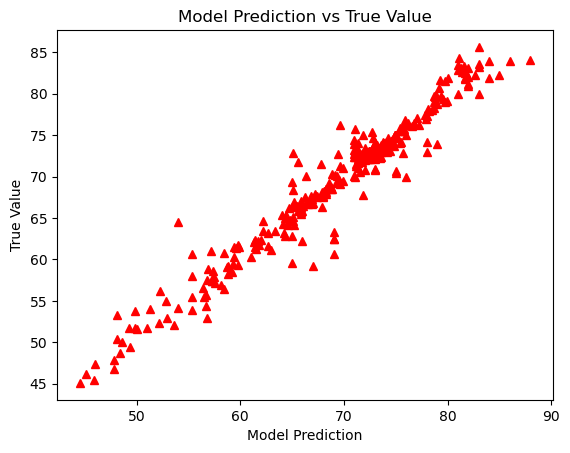

In [230]:
#Plot of predictions from trained model vs actual output (ground-truth)
plt.plot(y_test, y_predict, "^", color = "r")
plt.title('Model Prediction vs True Value')
plt.xlabel('Model Prediction')
plt.ylabel('True Value')
plt.show()

In [231]:
print('RMSE =',RMSE, '\nMSE =', MSE, '\nMAE =', MAE, '\nr2 =', r2, '\nadj_r2', adj_r2)

RMSE = 1.969 
MSE = 3.8761516 
MAE = 3.8761516 
r2 = 0.9473049152071411 
adj_r2 0.943712068516719


apply adjustments based on the amount of data